In [ ]:
!pip install -r requirements.txt

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("cogumelos_MODIFICADO.csv")

In [17]:
df.dropna(inplace=True)
df.drop(columns=["coluna completamente inutil (me remova)"], inplace=True)

    comestivel  diâmetro do chapéu  forma do chapéu  fixação das lamelas  \
14         1.0               863.0              6.0                  5.0   
20         1.0              1337.0              4.0                  4.0   
23         1.0              1180.0              6.0                  3.0   
27         1.0              1033.0              6.0                  4.0   
38         1.0               982.0              4.0                  6.0   

    cor das lamelas  altura do caule  largura do caule  cor do caule  \
14             10.0         0.254230            1239.0          11.0   
20             10.0         0.083133            1122.0          11.0   
23             10.0         0.727729            1370.0          11.0   
27             10.0         0.982385            1626.0          11.0   
38             10.0         1.165418            1577.0          11.0   

    coluna de origem duvidosa (use por sua conta em risco)   estação  
14                                     

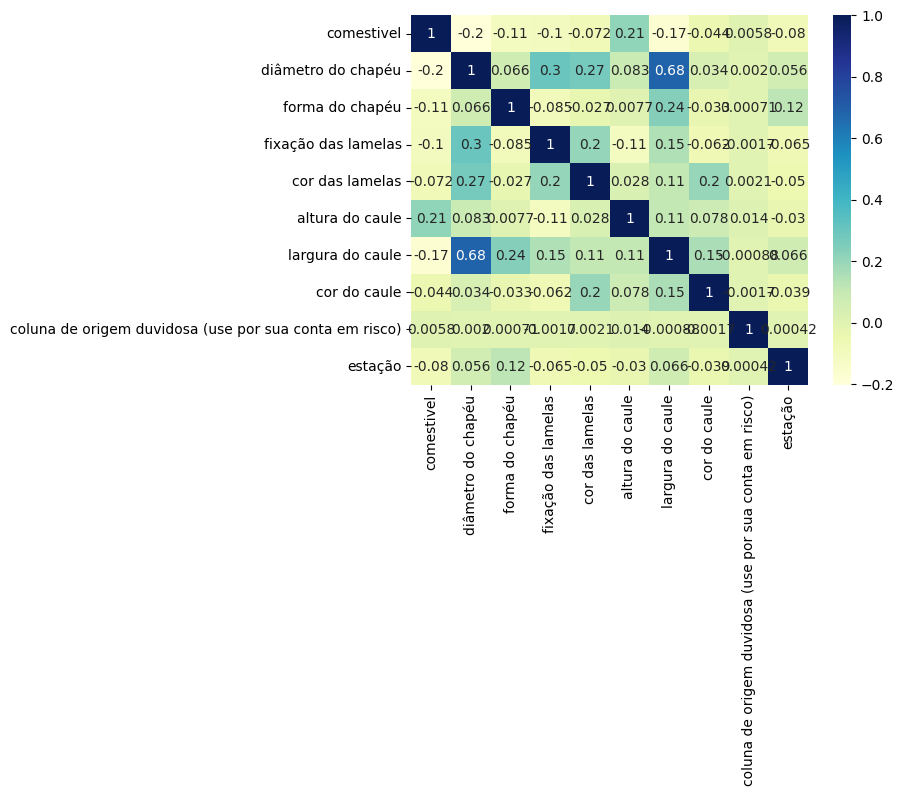

In [19]:
print(df.head())
print(df.describe())

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [20]:
X = df.drop(columns=["comestivel"])
y = df["comestivel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 64.08%
